<a href="https://colab.research.google.com/github/Mahima2208/YesBank-Stock/blob/main/Yes_Bank_Mahima_Phalkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the libarary
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Connect with Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_yesbank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Linear Regression/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv')

In [13]:
df_yesbank.shape

(185, 5)

In [4]:
df_yesbank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
df_yesbank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
df_yesbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df_yesbank.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [10]:
len(df_yesbank[df_yesbank.duplicated()])

0

In [12]:
df_yesbank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [16]:
df_yesbank.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [17]:
#Changing date colunn datatype to datetime format.
from datetime import datetime

#parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
df_yesbank['Date'] = df_yesbank['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [18]:
df_yesbank.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [19]:
df_yesbank.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


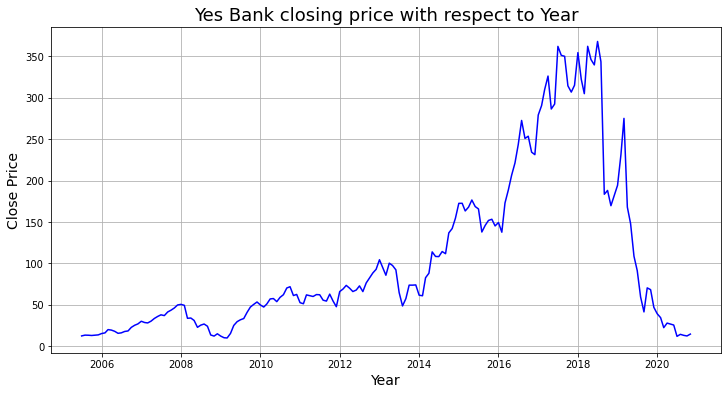

In [25]:
#Ploting close price of stock vs time
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Close Price' ,fontsize=14)
plt.plot(df_yesbank['Date'], df_yesbank['Close'] , color="blue")
plt.title('Yes Bank closing price with respect to Year', fontsize=18)

plt.show()

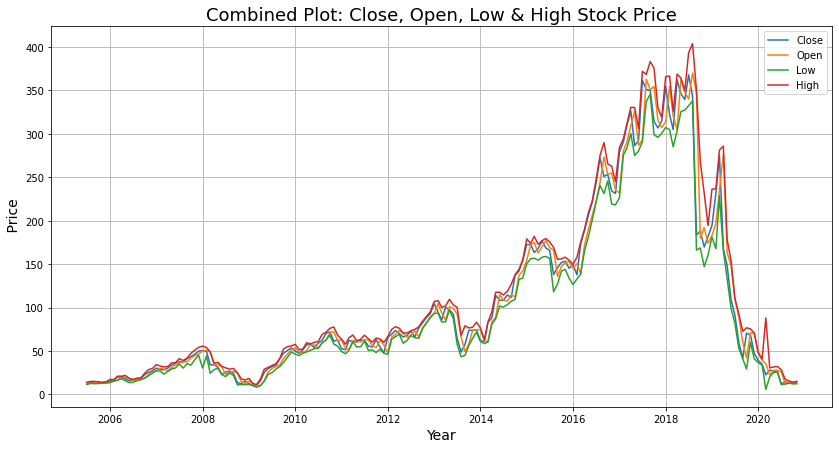

In [22]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel(' Price' ,fontsize=14)
plt.plot(df_yesbank['Date'], df_yesbank['Close'])
plt.plot(df_yesbank['Date'], df_yesbank['Open'])
plt.plot(df_yesbank['Date'], df_yesbank['Low'])
plt.plot(df_yesbank['Date'], df_yesbank['High'])
plt.legend(['Close','Open','Low','High'])
plt.title('Combined Plot: Close, Open, Low & High Stock Price', fontsize=18)
plt.show()

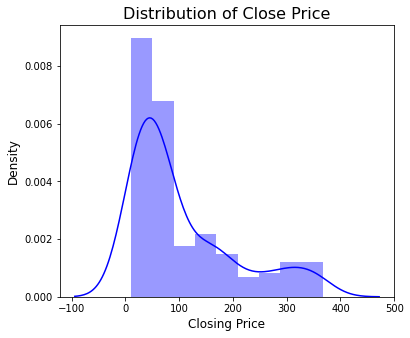

In [24]:
plt.figure(figsize=(6,5))
sns.distplot(df_yesbank['Close'],color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

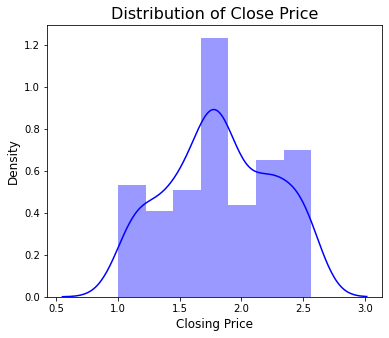

In [26]:
plt.figure(figsize=(6,5))
sns.distplot(np.log10(df_yesbank['Close']),color='blue')
plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Closing Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [27]:
numeric_features = df_yesbank.describe().columns

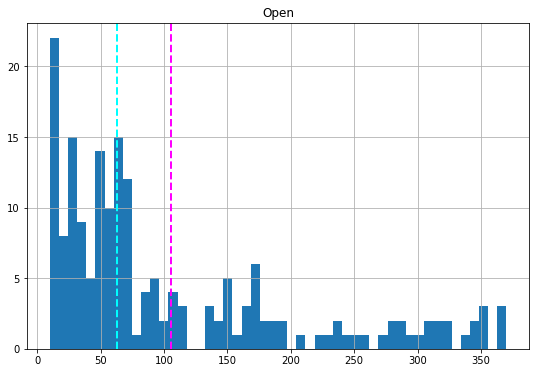

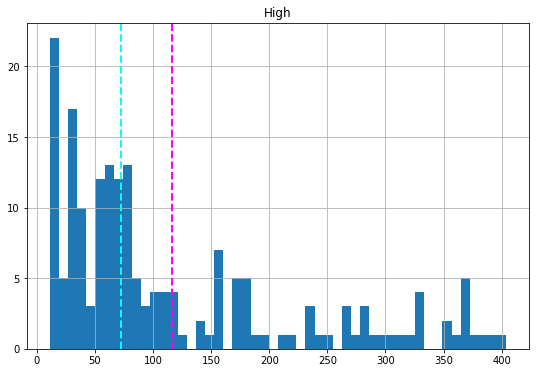

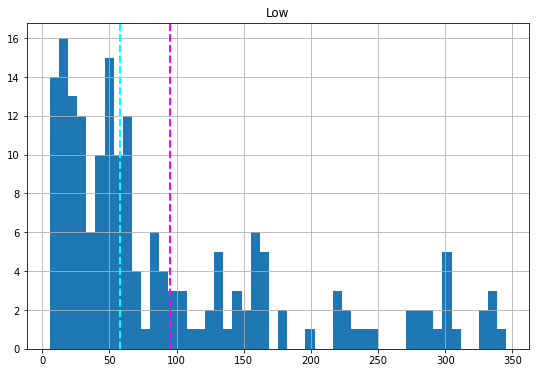

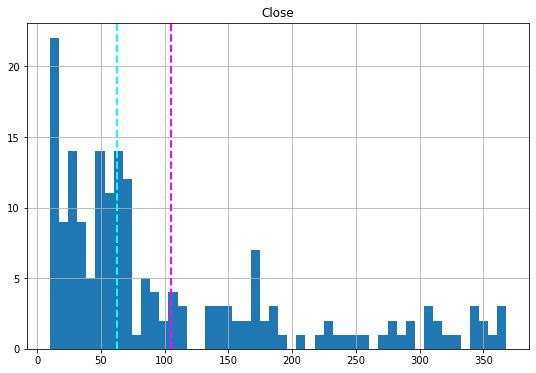

In [28]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_yesbank[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

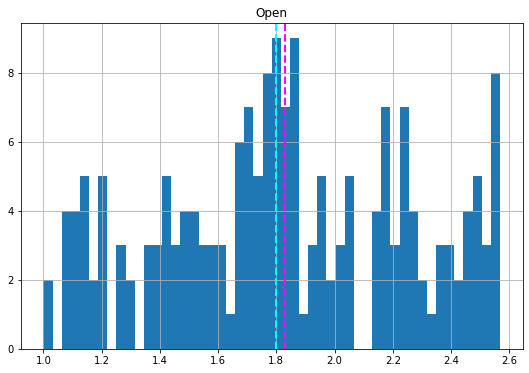

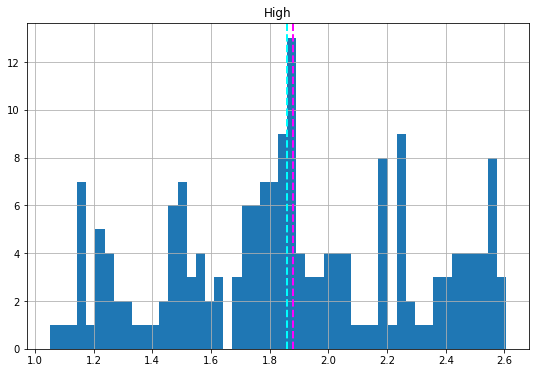

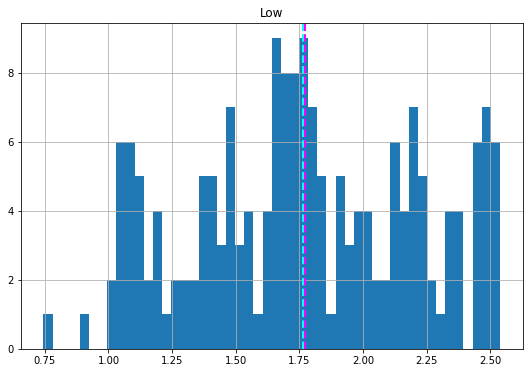

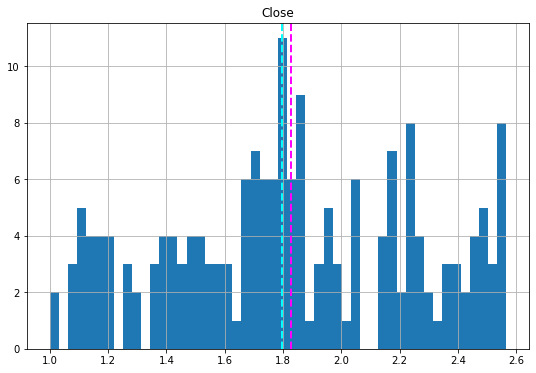

In [29]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(df_yesbank[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

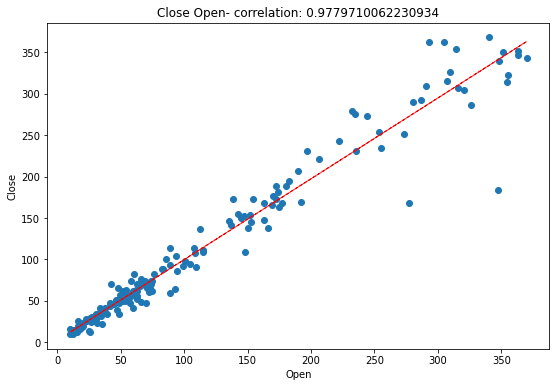

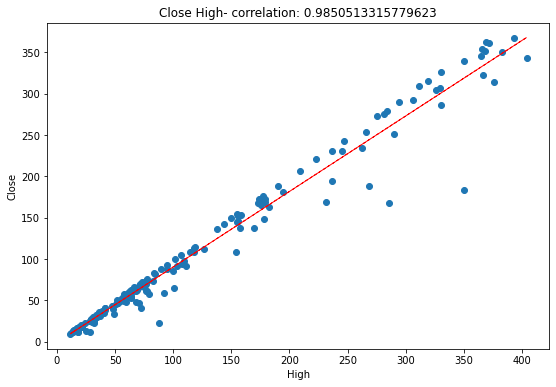

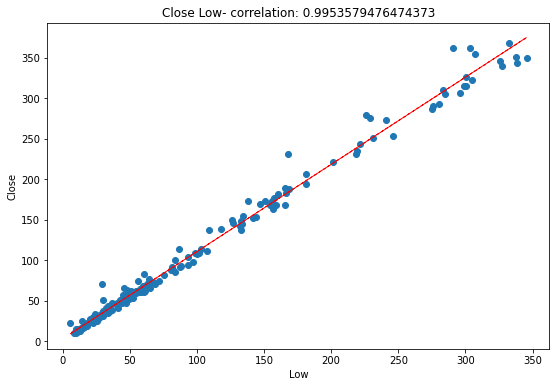

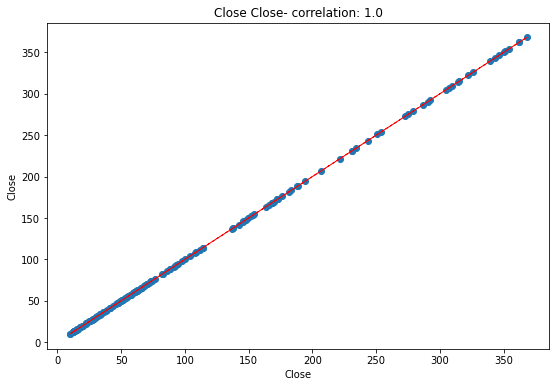

In [30]:
for col in numeric_features:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df_yesbank[col]
   label = df_yesbank['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('Close')
   ax.set_title('Close ' + col + '- correlation: ' + str(correlation))
   z = np.polyfit(df_yesbank[col], df_yesbank['Close'], 1)
   y_hat = np.poly1d(z)(df_yesbank[col])
 
   plt.plot(df_yesbank[col], y_hat, "r--", lw=1)
 
plt.show()

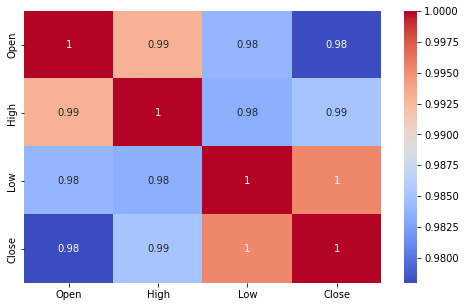

In [31]:
# Correlation
plt.figure(figsize=(8,5))
correlation = df_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [49]:
calc_vif(df_yesbank[[i for i in df_yesbank.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [50]:
calc_vif(df_yesbank[[i for i in df_yesbank.describe().columns if i not in ['Date','Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


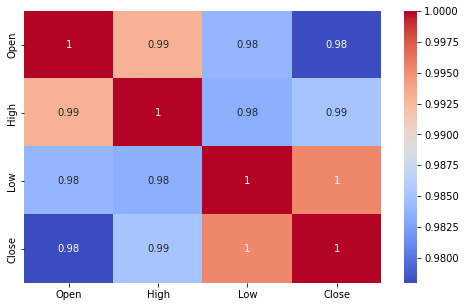

In [51]:
# Correlation
plt.figure(figsize=(8,5))
correlation = df_yesbank.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')